# Bias and Variance

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
# Read the data
df = pd.read_csv('datasets/Height_Weight.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
print (df.shape)

(10000, 3)


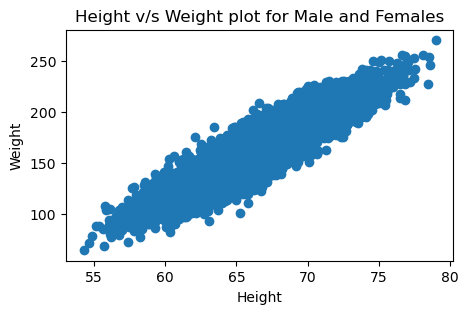

In [12]:
# plot the data
plt.figure(figsize=(5,3))
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height v/s Weight plot for Male and Females');

As height increases weight also increases

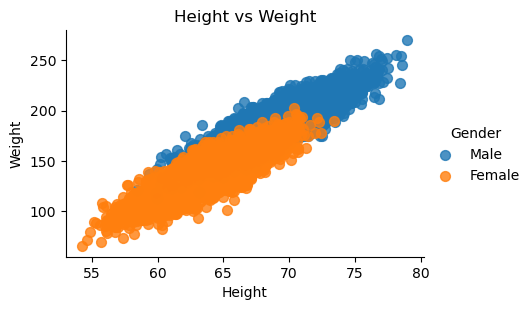

In [13]:
import seaborn as sns
sns.lmplot(data=df,x='Height', y='Weight',
           fit_reg=False,
           hue="Gender",
           scatter_kws={"marker": "D",
                        "s": 50},
          height=3, aspect=1.5)
plt.title('Height vs Weight')
plt.show()

## Take sample of 10 and plot the data using '.sample' method

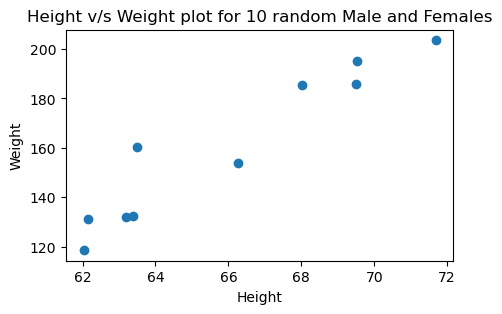

In [15]:
s_df = df.sample(n=10, random_state=11) 
plt.figure(figsize=(5,3))
plt.scatter(s_df['Height'], s_df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height v/s Weight plot for 10 random Male and Females');

## Split into Train and Test sets

In [16]:
train, test = train_test_split(s_df, test_size=0.3, random_state=11)
train = train.sort_values('Height')
test = test.sort_values('Height')

# predictors
xtrain = train['Height'].to_frame()
xtest  = test['Height'].to_frame()

# output
ytrain = train['Weight']
ytest  = test['Weight']

In [17]:
# 70 % data in training
print (xtrain.shape)
print (ytrain.shape)
# 30 % data in test
print (xtest.shape)
print (ytest.shape)

(7, 1)
(7,)
(3, 1)
(3,)


# Instantiate Linear Regression Model

In [18]:
lr = LinearRegression().fit(xtrain, ytrain)

# Calculate Score

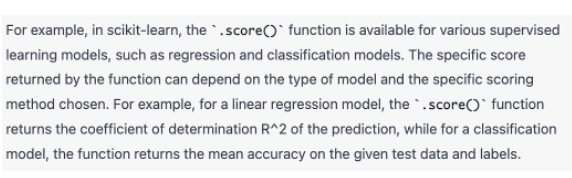

In [19]:
# the score is actually coefficient of determination which is r squared in regression
lr.score(xtrain, ytrain)

0.8159718383194039

# Calc coefficients and intercept

In [21]:
 lr.intercept_, lr.coef_

# weight = -351.917 + 7.77*height - moodel equation

(-351.91741225786865, array([7.77384594]))

# Plot the line 

In [31]:
xtrain.head(2)

,Height
5857,62.149296
6353,63.182618


In [32]:
ytrain.head(2)

5857    131.114973
6353    132.246094
Name: Weight, dtype: float64

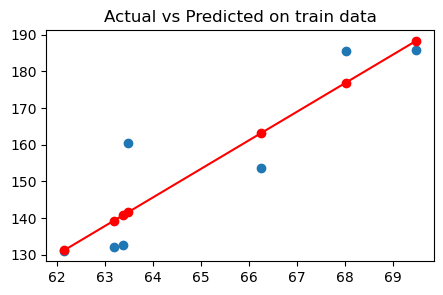

In [30]:
plt.figure(figsize=(5,3))

plt.scatter(xtrain, ytrain)  # actual data points
ypred = lr.predict(xtrain)
plt.scatter(xtrain, ypred,color='red');  # plt.plot by default gives line
plt.plot(xtrain, ypred,color='red');  # plt.plot by default gives line
plt.title('Actual vs Predicted on train data');

### Increase complexity of features using PolynomialFeatures

In [33]:
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(degree=4)
px = p.fit_transform(xtrain) # transforming xtrain into a polynomial one with deg=4
p.fit(px, ytrain) # using transformed xtrain and refitting into the model along with ytrain
# weight = 1 + height + heightˆ2 + heightˆ3 

PolynomialFeatures(degree=4)

In [34]:
print (xtrain)
print ('******************')
print (p)
print ('******************')
print (px)

         Height
5857  62.149296
6353  63.182618
9821  63.382801
5129  63.493143
6011  66.261527
1703  68.024569
3104  69.491523
******************
PolynomialFeatures(degree=4)
******************
[[1.00000000e+00 6.21492958e+01 3.86253496e+03 2.40053828e+05
  1.49191763e+07]
 [1.00000000e+00 6.31826178e+01 3.99204319e+03 2.52227739e+05
  1.59364088e+07]
 [1.00000000e+00 6.33828015e+01 4.01737953e+03 2.54632769e+05
  1.61393383e+07]
 [1.00000000e+00 6.34931430e+01 4.03137921e+03 2.55964937e+05
  1.62520183e+07]
 [1.00000000e+00 6.62615270e+01 4.39058997e+03 2.90927196e+05
  1.92772803e+07]
 [1.00000000e+00 6.80245692e+01 4.62734201e+03 3.14772947e+05
  2.14122941e+07]
 [1.00000000e+00 6.94915234e+01 4.82907183e+03 3.35579558e+05
  2.33199347e+07]]


In [35]:
print(62.149296*62.149296*62.149296*62.149296)

14919176.574433165


In [36]:
lr = LinearRegression().fit(px, ytrain) 
# using transformed xtrain along with ytrain in LinearRegression to check score
lr.score(px, ytrain)


0.8516616362136038

# Plot the new line

Now since complexity of features is increased and fit again on these spline features with same y_train, so this model equation line visits more data points.

In [40]:
px[0:2]  # So now fitted with features x,x^2,x^3,x^4

array([[1.00000000e+00, 6.21492958e+01, 3.86253496e+03, 2.40053828e+05,
        1.49191763e+07],
       [1.00000000e+00, 6.31826178e+01, 3.99204319e+03, 2.52227739e+05,
        1.59364088e+07]])

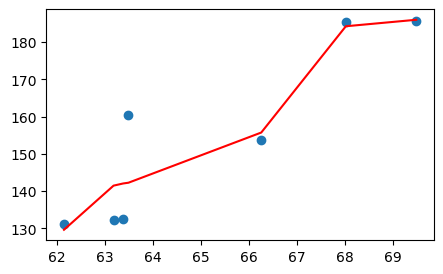

In [42]:
plt.figure(figsize=(5,3))

p_ypred = lr.predict(px)
plt.scatter(xtrain, ytrain)
plt.plot(xtrain, p_ypred, color = 'red');

# Plot multiple polynomial correlations with a range of degrees

As we r increasing the degrees (complexity of features/splines) our model is visiting more & more data points.

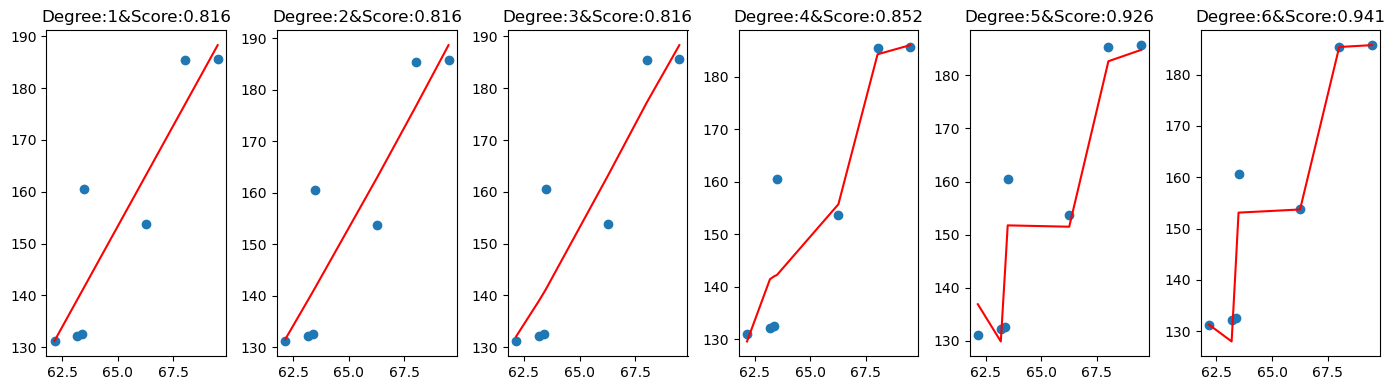

In [43]:
fig, ax = plt.subplots(1,6, figsize=(14,4))

for x, deg in enumerate([1,2,3,4,5,6]):
    p = PolynomialFeatures(degree=deg)
    p_x = p.fit_transform(xtrain)
    p.fit(p_x, ytrain)
    
    lr = LinearRegression().fit(p_x, ytrain)
    score_val = lr.score(p_x, ytrain)
    
    p_ypred = lr.predict(p_x)
    ax[x].scatter(xtrain, ytrain)
    ax[x].plot(xtrain, p_ypred, color='red')
    title_text = 'Degree:'+str(deg)+'&'+'Score:'+str(round(score_val,3))
    ax[x].set_title(title_text)
    plt.tight_layout()

# Dataset - Insurance

You can create different environments for different projects e.g. tf_env, opencv_env, geospacial_env etc

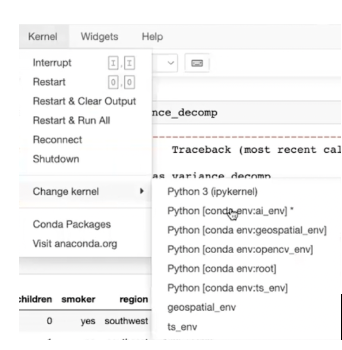


bias_variance_decomp library helps to create bias-variance models.

In [5]:
from mlxtend.evaluate import bias_variance_decomp

In [13]:
insurance = pd.read_csv('datasets/insurance.csv')
insurance.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [9]:
print (insurance.shape)

(1338, 7)


One hot encoding is generally preferred when u r applying ANN or other advanced methods on data.

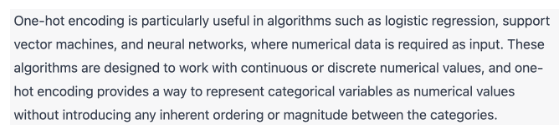

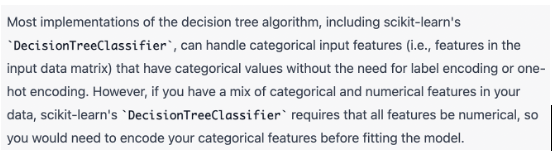

In [10]:
# understand pd.get_dummies converts categorical data to numerical data

con = pd.Series(list('abcba'))
print (con)
print ('******************')
print(pd.get_dummies(con))

0    a
1    b
2    c
3    b
4    a
dtype: object
******************
   a  b  c
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  1  0  0


In [14]:
# convert categorical columns to numerical columns
ohe = pd.get_dummies(insurance.drop(columns=['age', 'bmi', 'children', 'expenses']), drop_first=True)

ohe.head(10) 


,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,1,0,0
8,1,0,0,0,0
9,0,0,1,0,0


In [15]:
x = insurance.drop(columns='expenses')
ohe_x = pd.concat([x, ohe], axis=1) # axis = 1 means along column
ohe_x.head()

,age,sex,bmi,children,smoker,region,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.9,0,yes,southwest,0,1,0,0,1
1,18,male,33.8,1,no,southeast,1,0,0,1,0
2,28,male,33.0,3,no,southeast,1,0,0,1,0
3,33,male,22.7,0,no,northwest,1,0,1,0,0
4,32,male,28.9,0,no,northwest,1,0,1,0,0


In [16]:
ohe_x = ohe_x.drop(columns=['sex', 'smoker', 'region'])
ohe_x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,0,1,0,0,1
1,18,33.8,1,1,0,0,1,0
2,28,33.0,3,1,0,0,1,0
3,33,22.7,0,1,0,1,0,0
4,32,28.9,0,1,0,1,0,0


In [17]:
y = insurance['expenses']   # dependent variable

In [18]:
x1train, x1test, y1train, y1test = train_test_split(ohe_x, y, test_size = 0.2, random_state=1)

In [19]:
x1train.shape, x1test.shape, y1train.shape, y1test.shape

((1070, 8), (268, 8), (1070,), (268,))

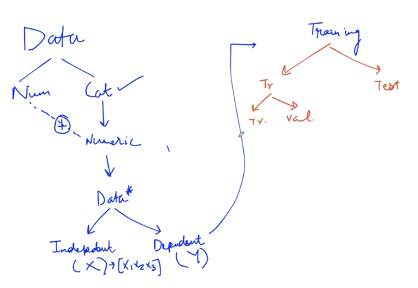

# Calc overall bias and variance along with training and testing error

In [20]:
all_bias = []
all_var  = []
all_test_loss = []
all_train_loss = []

for x in range(1, 15):
    dr = DecisionTreeRegressor(max_depth=x)
    avg_exp_loss, avg_bias, avg_var = bias_variance_decomp(dr, x1train.values, y1train.values, x1test.values, y1test.values, loss='mse', random_seed=123)    
    
    all_test_loss.append(avg_exp_loss) # test-loss
    all_bias.append(avg_bias)
    all_var.append(avg_var)
    
    avg_exp_loss, avg_bias, avg_var = bias_variance_decomp(dr, x1train.values, y1train.values, x1train.values, y1train.values, loss='mse', random_seed=123)  
                                                                                            #providing train data twice coz by default it gives test loss only 
    all_train_loss.append(avg_exp_loss) # train-loss
    
    

# Plot the Bias and Variance

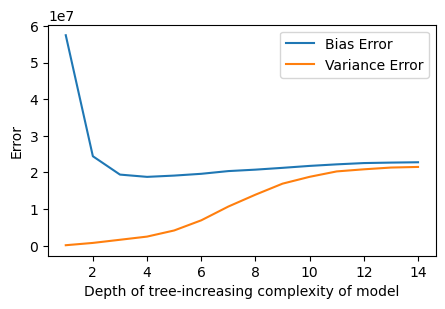

In [27]:
plt.figure(figsize=(5,3))

plt.plot(range(1, 15), all_bias)
plt.plot(range(1, 15), all_var)
plt.xlabel('Depth of tree-increasing complexity of model')
plt.ylabel('Error')
plt.legend(['Bias Error', 'Variance Error']);

**Analysis**

- As complexity of model increases with increasing depth of tree, bias decreases as model visits more data points and fits better & better gets closer to actual data points hence difference b/w actual & predicted train values is less.
- On other hand variance increases with increasing complexity because slight change in data can cause whole model to change and hence get absolutely different predictions on test set.
- **Challenge is to get low bias and low variance model, so we have to be somewhere b/w 4 and 6 depth as in above figure.** But as we check below figure for training & testing loss also the optimum value should be 3 or 4.

# Plot Training and Testing Errors

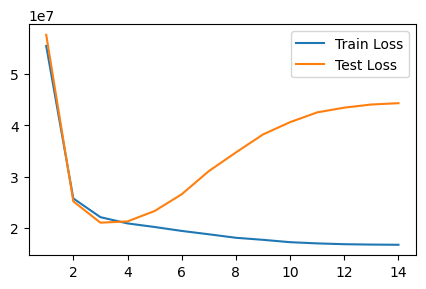

In [28]:
plt.figure(figsize=(5,3))

plt.plot(range(1, 15), all_train_loss)
plt.plot(range(1, 15), all_test_loss)
plt.legend(['Train Loss', 'Test Loss']);

**Analysis**

- As complexity of model is increasing (here in terms of depth of tree increasing, so more complex connecting function will be there b/w i/p and o/p) the training error keeps on decreasing, it fits data better & better as visits more & more granular data points, more if-else decisions.
- For test loss it decreases to a certain depth & then it increases drastically (gets a U shape). This is due to bias-variance, bias decreased a lot & hence variance increased giving very different predictions from trained data. 
- So optimum depth can be 3 or 4 as beyond that variance loss keeps on increasing - model goes towards overfitting side.



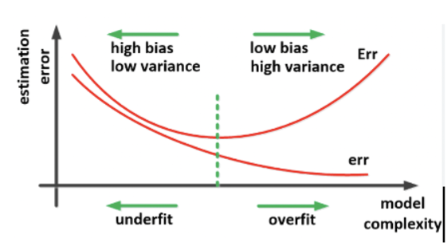

- In general for any ML algorithm to decide on which parameters to choose (e.g. here we decide on depth of decision tree) can draw bias variance graphs w.r.t to the complexities w.r.t model and also train test loss graphs for given complexities of same model.
- These visualizations can help u make better judgement on which parameters of algorithm should be used so we get a better generalized model.
- For generalized model it is important to choose appropriate model complexity that balance the bias & variance.

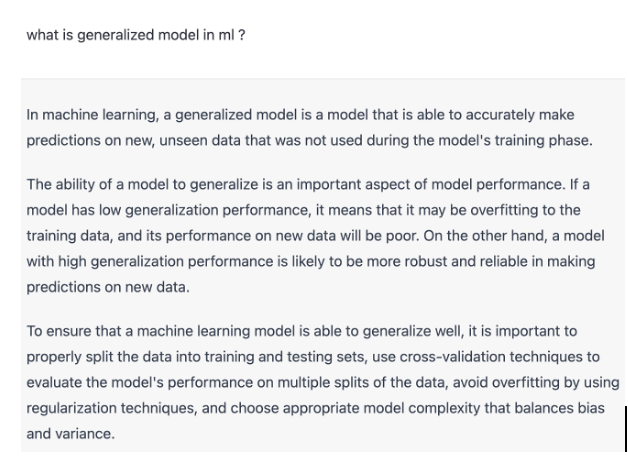